# Load dataset

In [2]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


# Model 1: base model

In [3]:
# storing loss of all models
hist = {}

In [4]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [5]:
## TODO: Specify a CNN architecture

model_1 = Sequential()
model_1.add(Convolution2D(16, (3,3), strides=(2, 2), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_1.add(BatchNormalization())
model_1.add(Convolution2D(32, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Convolution2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Convolution2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(256, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(y_train.shape[1], ))

# Summarize the model
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [6]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
batch_size = 32
epochs = 120

model_1.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_1.h5", verbose = 0, save_best_only = True)
hist['model_1'] = model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/120
1712/1712 [==============================] - 2s - loss: 0.2874 - mean_squared_error: 0.2874 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 2/120
1712/1712 [==============================] - 1s - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 3/120
1712/1712 [==============================] - 1s - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 4/120
1712/1712 [==============================] - 1s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 5/120
1712/1712 [==============================] - 1s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 6/120
1712/1712 [==============================] - 1s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 7/120
1712/

1712/1712 [==============================] - 1s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 105/120
1712/1712 [==============================] - 1s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 106/120
1712/1712 [==============================] - 1s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 107/120
1712/1712 [==============================] - 1s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 108/120
1712/1712 [==============================] - 1s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 109/120
1712/1712 [==============================] - 1s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 110/120
1712/1712 [==============================] - 1s - lo

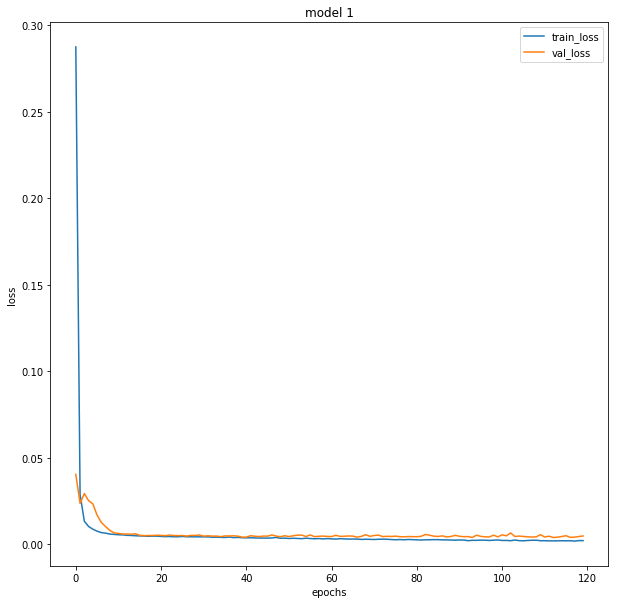

In [7]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_1'].history['loss']
val_loss = hist['model_1'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 1")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Model 2: Replace GAP layer by flatten layer

In [8]:
## TODO: Specify a CNN architecture

model_2 = Sequential()
model_2.add(Convolution2D(16, (3,3), strides=(2, 2), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_2.add(BatchNormalization())
model_2.add(Convolution2D(32, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Convolution2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Convolution2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(y_train.shape[1], ))

# Summarize the model
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [9]:
## TODO: Compile the model
batch_size = 32
epochs = 120

model_2.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_2.h5", verbose = 0, save_best_only = True)
hist['model_2'] = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/120
1712/1712 [==============================] - 2s - loss: 0.3940 - mean_squared_error: 0.3940 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 2/120
1712/1712 [==============================] - 1s - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 3/120
1712/1712 [==============================] - 1s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 4/120
1712/1712 [==============================] - 1s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 5/120
1712/1712 [==============================] - 1s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 6/120
1712/1712 [==============================] - 1s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 7/120
1712/

1712/1712 [==============================] - 1s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 105/120
1712/1712 [==============================] - 1s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 106/120
1712/1712 [==============================] - 1s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 107/120
1712/1712 [==============================] - 1s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 108/120
1712/1712 [==============================] - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 109/120
1712/1712 [==============================] - 1s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 110/120
1712/1712 [==============================] - 1s - lo

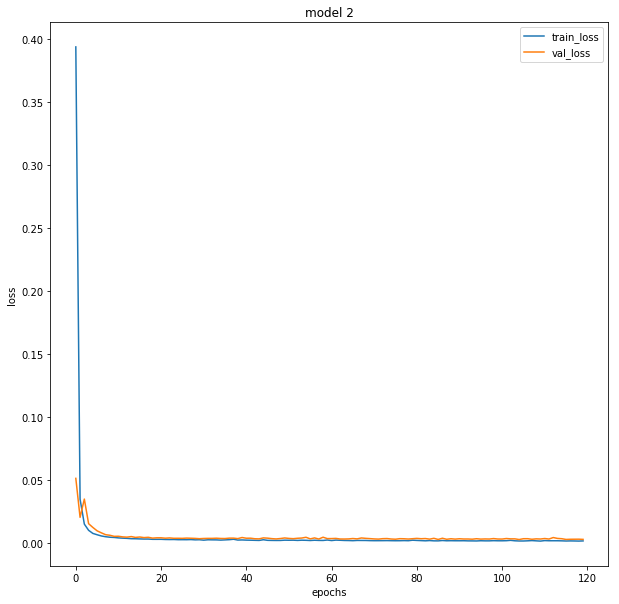

In [10]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_2'].history['loss']
val_loss = hist['model_2'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 2")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Model 3: Using multiple Maxpooling layers instead of 2x2 strides

In [11]:
## TODO: Specify a CNN architecture

model_3 = Sequential()
model_3.add(Convolution2D(16, (3,3), strides=(1, 1), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Convolution2D(32, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Convolution2D(64, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Convolution2D(128, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(y_train.shape[1], ))

# Summarize the model
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 96, 96, 16)        160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [12]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
batch_size = 32
epochs = 120

model_3.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_3.h5", verbose = 0, save_best_only = True)
hist['model_3'] = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/120
1712/1712 [==============================] - 5s - loss: 0.3328 - mean_squared_error: 0.3328 - val_loss: 0.9628 - val_mean_squared_error: 0.9628
Epoch 2/120
1712/1712 [==============================] - 3s - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 6.7217 - val_mean_squared_error: 6.7217
Epoch 3/120
1712/1712 [==============================] - 3s - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 10.1729 - val_mean_squared_error: 10.1729
Epoch 4/120
1712/1712 [==============================] - 3s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 12.5213 - val_mean_squared_error: 12.5213
Epoch 5/120
1712/1712 [==============================] - 3s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 15.5759 - val_mean_squared_error: 15.5759
Epoch 6/120
1712/1712 [==============================] - 3s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 12.8136 - val_mean_squared_error: 12.8136
Epoch 7/1

1712/1712 [==============================] - 3s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 105/120
1712/1712 [==============================] - 3s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 106/120
1712/1712 [==============================] - 3s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 107/120
1712/1712 [==============================] - 4s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 108/120
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 109/120
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 110/120
1712/1712 [==============================] - 3s - lo

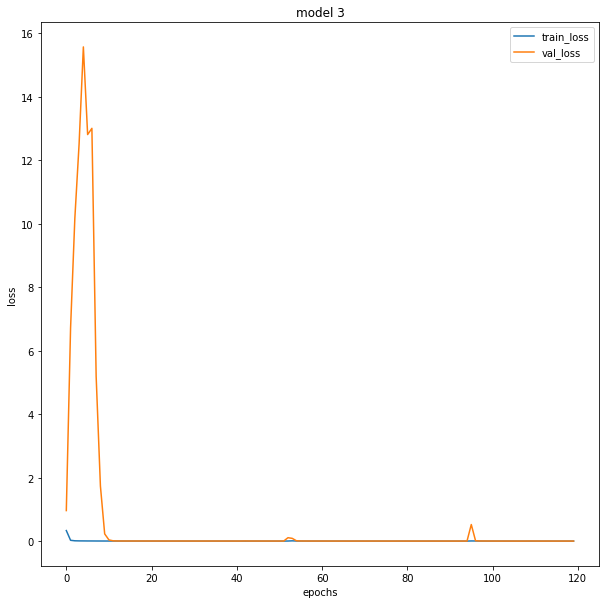

In [13]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_3'].history['loss']
val_loss = hist['model_3'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 3")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Model 4: Increase number of CONV layers and using 2x2 stride instead of Maxpooling

In [14]:
## TODO: Specify a CNN architecture

model_4 = Sequential()
model_4.add(Convolution2D(16, (3,3), strides=(1, 1), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(16, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(32, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(32, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(64, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(128, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dense(y_train.shape[1], ))

# Summarize the model
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 16)        160       
_________________________________________________________________
batch_normalization_16 (Batc (None, 96, 96, 16)        64        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
__________

In [15]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
batch_size = 32
epochs = 120

model_4.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_4.h5", verbose = 0, save_best_only = True)
hist['model_4'] = model_4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/120
1712/1712 [==============================] - 7s - loss: 0.4853 - mean_squared_error: 0.4853 - val_loss: 0.1104 - val_mean_squared_error: 0.1104.
Epoch 2/120
1712/1712 [==============================] - 5s - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 3/120
1712/1712 [==============================] - 5s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 4/120
1712/1712 [==============================] - 5s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 5/120
1712/1712 [==============================] - 5s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6/120
1712/1712 [==============================] - 5s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0101 - val_mean_squared_error: 0.0101.00 - ETA: 1s - l

1712/1712 [==============================] - 5s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 91/120
1712/1712 [==============================] - 5s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0032 - val_mean_squared_error: 0.0032.00 - ETA: 3s - loss: 0.0016 - mean - ETA: 1s - l
Epoch 92/120
1712/1712 [==============================] - 5s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 93/120
1712/1712 [==============================] - 5s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 94/120
1712/1712 [==============================] - 5s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 95/120
1712/1712 [==============================] - 5s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0025 - val_mean_squared_error: 0.0025.00 - ETA: 4s - loss: 0

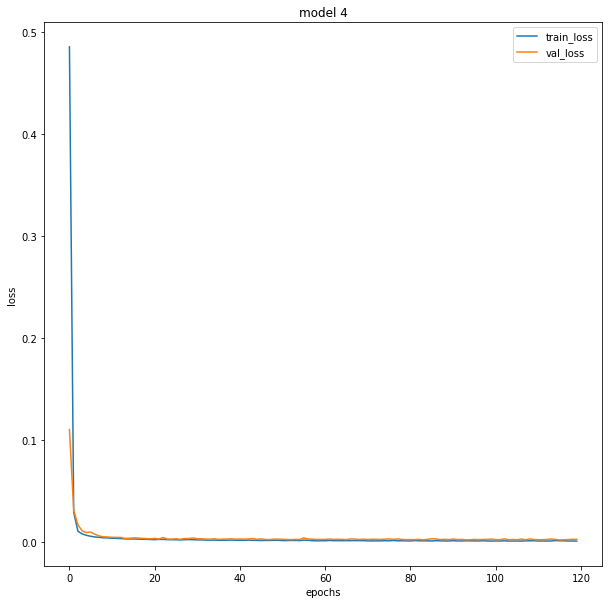

In [16]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_4'].history['loss']
val_loss = hist['model_4'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 4")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Visualize loss of all models

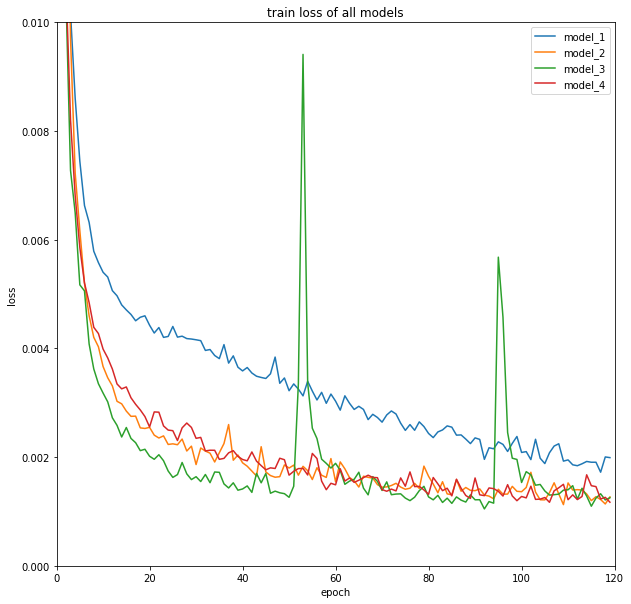

In [31]:
model_names = list(hist.keys())
model_names.sort()
model_loss_fig = plt.figure(figsize = (10,10))
for model_name in model_names:
    plt.plot(hist[model_name].history['loss'])

plt.title('train loss of all models')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,120])
plt.ylim([0,0.01])
plt.legend(model_names, loc='upper right')
plt.show()

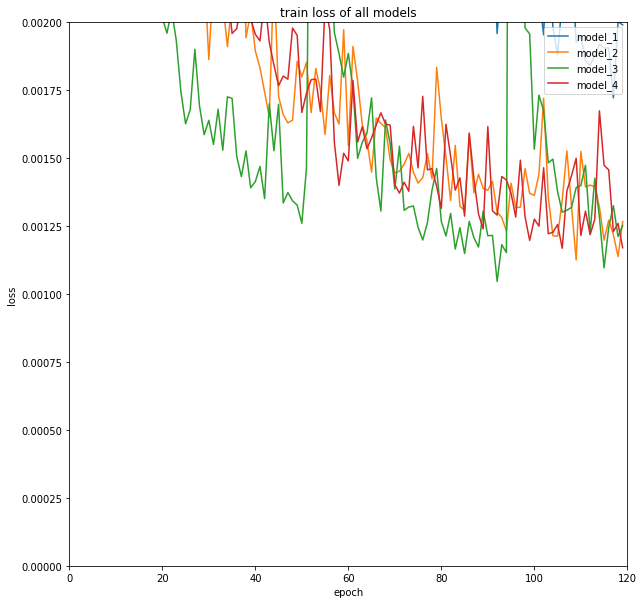

In [32]:
model_names = list(hist.keys())
model_names.sort()
model_loss_fig = plt.figure(figsize = (10,10))
for model_name in model_names:
    plt.plot(hist[model_name].history['loss'])

plt.title('train loss of all models')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,120])
plt.ylim([0,0.002])
plt.legend(model_names, loc='upper right')
plt.show()